Lecture 10 - outliers and ordinal data

Announcements
1. Problem set 5 and Quiz 5 due on Sunday!

Last class, we talked about how to identify outliers, but we didn't actually remove them! So, let's do that. Let's also make an ordinal column for our horsepower. So, that way, we have a couple of different tests of it

1. Remove outliers
2. Ordinal data for horsepower
3. Intro into Machine Learning!
4. Quiz 4 review

As always, let's load our libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here is our filename

In [ ]:
filename = 'dummed_coded_data.csv'

Now I will load the filename. Note that I messed up saving last time, so I had to resave the data. Just note that I saved the csv with the input argument "index = False" so I didn't want to worry about the index column in my datafile. Nice!

In [ ]:
data = pd.read_csv(filename,index_col=0)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,chevrolet,nevs,nissan,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1
1,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1
2,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1
3,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,japan,toyota,Coupe,0,0,0,0,1,0,0,1,1,0,1,0
4,26.0,4.0,12.0,46.0,1835.0,20.5,70.0,europe,volkswagen,Coupe,0,0,0,0,0,1,0,1,0,0,0,0


Like before. Let's look at our boxplots of the data to get an idea of the outliers

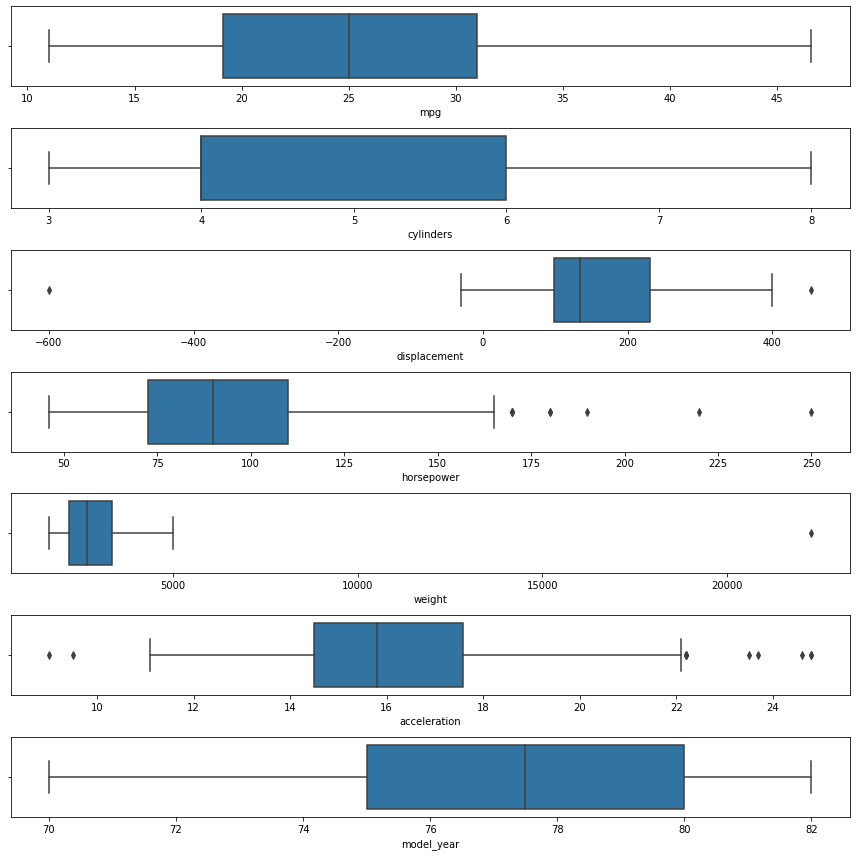

In [ ]:
fig,axes = plt.subplots(7,1,figsize=(12,12))

count = 0
for column in data.columns:
  if isinstance(data[column][0],float)==1:
    sns.boxplot(x = data[column],ax=axes[count])
    count = count + 1

plt.tight_layout()

We talked about two methods to remove these outliers

1. multiple of the standard deviation
2. outside of IQR which is basically what the boxplot is doing 

A third method is domain knowledge (e.g., you bring in your own experience to say "hey, this is the threshold of what an outlier is based on what I know about this topic) but this is less common and someone will always ask that you compute outliers

Let's just make a copy so we can hold onto our original data

In [ ]:
data2 = data.copy()

Here, let's make a function that can detect outliers for us. Its using that IQR method we talked about, where values outside of these boundsa are considered outliers

In [ ]:
def remove_outliers(ser):

  Q1 = ser.quantile(.25)
  Q3 = ser.quantile(.75)
  IQR = Q3-Q1

  return np.where((ser > (Q3+(IQR*1.5))) | (ser < (Q1-(IQR*1.5))),np.nan,ser)

And we can then run our function for each column in our dataframe

In [ ]:
for column in data2.columns:
  if isinstance(data2[column][0],float)==1: # this checks strings but also means we don't go through the dummy coded columns!
    data2[column] = remove_outliers(data2[column])

In [ ]:
data2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,chevrolet,nevs,nissan,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP
count,358.000000,358.000000,356.000000,350.000000,357.000000,348.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,25.392179,5.081006,166.851124,92.497143,2819.641457,16.007471,77.357542,0.405028,0.041899,0.002793,0.094972,0.189944,0.150838,0.055866,0.393855,0.231844,0.530726,0.477654,0.162011
std,7.473984,1.514312,86.110821,25.719642,743.671385,2.307500,3.104273,0.491585,0.200640,0.052852,0.293587,0.392806,0.358392,0.229984,0.489287,0.422600,0.499753,0.500199,0.368977
min,11.000000,3.000000,-30.000000,46.000000,1649.000000,11.100000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.125000,4.000000,98.000000,72.000000,2190.000000,14.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,4.000000,134.000000,90.000000,2694.000000,15.800000,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,31.000000,6.000000,231.000000,105.000000,3336.000000,17.325000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,46.600000,8.000000,400.000000,165.000000,4997.000000,22.100000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


But, you see, we have this problem where displacement still has a negative value. That's not good. Let's fix that

In [ ]:
data2 = data.copy()

We are basically running the same code as before, but I added another check to make sure the data is positive

In [ ]:
def remove_outliers(ser):

  # basically, us using some domain knowledge!
  ser = pd.Series(np.where(ser < 0,np.nan,ser)) 
  ser = pd.Series(np.where(ser >20000,np.nan,ser))

  Q1 = ser.quantile(.25)
  Q3 = ser.quantile(.75)
  IQR = Q3-Q1

  return np.where((ser > (Q3+(IQR*1.5))) | (ser < (Q1-(IQR*1.5))),np.nan,ser)

In [ ]:
for column in data2.columns:
  if isinstance(data2[column][0],float)==1: # this checks strings but also means we don't go through the dummy coded columns!
    data2[column] = remove_outliers(data2[column])

In [ ]:
data2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,chevrolet,nevs,nissan,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP
count,358.000000,358.000000,355.000000,350.000000,357.000000,348.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,25.392179,5.081006,167.405634,92.497143,2819.641457,16.007471,77.357542,0.405028,0.041899,0.002793,0.094972,0.189944,0.150838,0.055866,0.393855,0.231844,0.530726,0.477654,0.162011
std,7.473984,1.514312,85.593501,25.719642,743.671385,2.307500,3.104273,0.491585,0.200640,0.052852,0.293587,0.392806,0.358392,0.229984,0.489287,0.422600,0.499753,0.500199,0.368977
min,11.000000,3.000000,12.000000,46.000000,1649.000000,11.100000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.125000,4.000000,98.000000,72.000000,2190.000000,14.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,4.000000,134.000000,90.000000,2694.000000,15.800000,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,31.000000,6.000000,231.000000,105.000000,3336.000000,17.325000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,46.600000,8.000000,400.000000,165.000000,4997.000000,22.100000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Much better! 

Let's visualize our outliers, which should now be NaNs

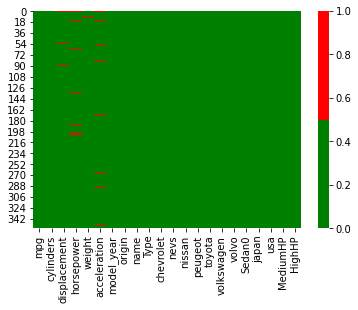

In [ ]:
sns.heatmap(data2.isnull(),cmap=['Green','Red'])

In this case, let's just remove them. Note I'm using inplace which means this line of code will take the place of my other one

In [ ]:
data2.dropna(inplace=True)

Note that I am also going to change the indexes to be 0,1,2,3..... That way, I don't have to worry about my indexes having missing values

In [ ]:
data2.index = np.arange(0,data2.shape[0])

Let's add an ordinal column of the horsepower data

That way, we will have the following:

1. original data
2. binned data that was dummy coded into separate columns
3. binned data that was kept in the same column

The difference is that with ordinal, its just a single column. The numbers have meaning - they specify rank. But the difference between the numbers is not meaning

I'm going to create this new column using a for loop and taking advantage of my dummy coded columns

In [ ]:
hp_ordinal = []
for row in np.arange(0,data2.shape[0]):

  if (data2['MediumHP'][row] == 0) & (data2['HighHP'][row] == 0):
    hp_ordinal.append(1)
  elif data2['MediumHP'][row] == 1:
    hp_ordinal.append(2)
  elif data2['HighHP'][row] == 1:
    hp_ordinal.append(3)

Now, I will insert it into my dataframe. I could have created a separate dataframe then concatenated, but that seems a bit too much extra work!

In [ ]:
data2.insert(len(data2.columns),'HP_ordinal',hp_ordinal,)

Let's check it out by looking at the head

In [ ]:
data2.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Type,chevrolet,nevs,nissan,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP,HP_ordinal
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
1,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,japan,toyota,Coupe,0,0,0,0,1,0,0,1,1,0,1,0,2
2,26.0,4.0,12.0,46.0,1835.0,20.5,70.0,europe,volkswagen,Coupe,0,0,0,0,0,1,0,1,0,0,0,0,1
3,25.0,4.0,110.0,87.0,2672.0,15.8,70.0,europe,peugeot,Sedan,0,0,0,1,0,0,0,0,0,0,1,0,2
4,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,europe,audi,Coupe,0,0,0,0,0,0,0,1,0,0,1,0,2
5,25.0,4.0,104.0,95.0,2375.0,17.5,70.0,europe,nevs,Coupe,0,1,0,0,0,0,0,1,0,0,1,0,2
6,28.0,4.0,140.0,90.0,2264.0,15.5,71.0,usa,chevrolet,Coupe,1,0,0,0,0,0,0,1,0,1,1,0,2
7,17.0,6.0,250.0,100.0,3329.0,15.5,71.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,1,0,2
8,14.0,8.0,350.0,165.0,4209.0,12.0,71.0,usa,chevrolet,Sedan,1,0,0,0,0,0,0,0,0,1,0,1,3
9,22.0,4.0,134.0,72.0,2408.0,19.0,71.0,usa,chevrolet,Coupe,1,0,0,0,0,0,0,1,0,1,0,0,1


And lastly, let's check our final dataframe

In [ ]:
data2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,chevrolet,nevs,nissan,peugeot,toyota,volkswagen,volvo,Sedan0,japan,usa,MediumHP,HighHP,HP_ordinal
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,25.475811,5.032448,164.218289,93.002950,2790.825959,16.084071,77.421829,0.407080,0.044248,0.002950,0.094395,0.188791,0.150442,0.056047,0.401180,0.241888,0.528024,0.495575,0.144543,1.784661
std,7.359951,1.470260,81.247847,25.451718,723.108471,2.247651,3.077249,0.492016,0.205949,0.054313,0.292810,0.391921,0.358033,0.230353,0.490862,0.428860,0.499952,0.500719,0.352159,0.677797
min,11.000000,3.000000,12.000000,46.000000,1649.000000,11.200000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.200000,4.000000,98.000000,74.000000,2189.000000,14.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.000000,4.000000,134.000000,90.000000,2671.000000,15.800000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,31.000000,6.000000,231.000000,106.500000,3270.000000,17.400000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,46.600000,8.000000,400.000000,165.000000,4997.000000,22.100000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 338
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           339 non-null    float64
 1   cylinders     339 non-null    float64
 2   displacement  339 non-null    float64
 3   horsepower    339 non-null    float64
 4   weight        339 non-null    float64
 5   acceleration  339 non-null    float64
 6   model_year    339 non-null    float64
 7   origin        339 non-null    object 
 8   name          339 non-null    object 
 9   Type          339 non-null    object 
 10  chevrolet     339 non-null    int64  
 11  nevs          339 non-null    int64  
 12  nissan        339 non-null    int64  
 13  peugeot       339 non-null    int64  
 14  toyota        339 non-null    int64  
 15  volkswagen    339 non-null    int64  
 16  volvo         339 non-null    int64  
 17  Sedan0        339 non-null    int64  
 18  japan         339 non-null    

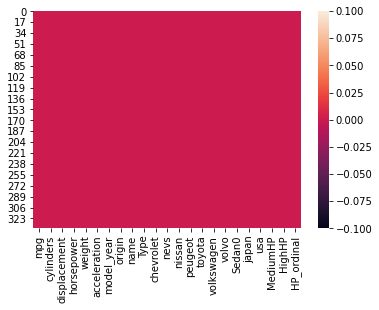

In [ ]:
sns.heatmap(data2.isnull())

Now let's save the data!

In [ ]:
data2.to_csv('final_mpg_dataset.csv',index=False)

So, in conclusion, that was a crash course in how to do feature engineering. There is obviously more one could do, but this covers most of the basic things.

When thinking about an order to do these things, I think the following order is pretty good:

1. remove duplicates

2. remove erroneous data entries (e.g., outliers that are obviously incorrect)

3. remove outliers using IQR or standard deviation

4. replace missing data or remove rows with missing data

5. Dummy coding, binning, etc etc